In [1]:
import requests
import os
import urllib
import csv
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
merged_df = pd.read_csv("..\Final_Datasets\MergedTVandMovies.csv", dtype='unicode', encoding='utf8' )    
merged_df["IMDb"] = merged_df["IMDb"].astype(float)
merged_df["Netflix"] = merged_df["Netflix"].astype(float)
merged_df["Hulu"] = merged_df["Hulu"].astype(float)
merged_df["Prime Video"] = merged_df["Prime Video"].astype(float)
merged_df["Disney+"] = merged_df["Disney+"].astype(float)
merged_df["IMDb"] =round(merged_df["IMDb"])

merged_df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,movies,shows
0,0,Inception,2010,13+,9.0,87%,1.0,0.0,0.0,0.0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148,Movie,NaN
1,1,The Matrix,1999,18+,9.0,87%,1.0,0.0,0.0,0.0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136,Movie,NaN
2,2,Avengers: Infinity War,2018,13+,8.0,84%,1.0,0.0,0.0,0.0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149,Movie,NaN
3,3,Back to the Future,1985,7+,8.0,96%,1.0,0.0,0.0,0.0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116,Movie,NaN
4,4,"The Good, the Bad and the Ugly",1966,18+,9.0,97%,1.0,0.0,1.0,0.0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161,Movie,NaN


In [3]:
df1 = merged_df[["IMDb", "Netflix","Hulu", "Prime Video", "Disney+", "movies", "shows" ]]
df1.head()

,IMDb,Netflix,Hulu,Prime Video,Disney+,movies,shows
0,9.0,1.0,0.0,0.0,0.0,Movie,NaN
1,9.0,1.0,0.0,0.0,0.0,Movie,NaN
2,8.0,1.0,0.0,0.0,0.0,Movie,NaN
3,8.0,1.0,0.0,0.0,0.0,Movie,NaN
4,9.0,1.0,0.0,1.0,0.0,Movie,NaN


In [4]:
#Get Mean of all movies
df1_movies = df1.loc[merged_df['movies'] == 'Movie']
df1_mean_movies_IMDB = df1_movies["IMDb"]
overall_movies_avg_IMDB = round(df1_mean_movies_IMDB.mean(),2)
overall_movies_avg_IMDB

5.9

In [5]:
#Drops null IMDB row from movies DF
df_movies_notnull = pd.notnull(df1_movies["IMDb"])
df_movies_IMDb_notnull =df1_movies[df_movies_notnull]
df_movies_IMDb_notnull

,IMDb,Netflix,Hulu,Prime Video,Disney+,movies,shows
0,9.0,1.0,0.0,0.0,0.0,Movie,NaN
1,9.0,1.0,0.0,0.0,0.0,Movie,NaN
2,8.0,1.0,0.0,0.0,0.0,Movie,NaN
3,8.0,1.0,0.0,0.0,0.0,Movie,NaN
4,9.0,1.0,0.0,1.0,0.0,Movie,NaN
...,...,...,...,...,...,...,...
16738,5.0,0.0,0.0,0.0,1.0,Movie,NaN
16739,6.0,0.0,0.0,0.0,1.0,Movie,NaN
16740,5.0,0.0,0.0,0.0,1.0,Movie,NaN
16741,6.0,0.0,0.0,0.0,1.0,Movie,NaN


In [6]:
#count of all movies on each site
df_netflix = df_movies_IMDb_notnull.loc[df_movies_IMDb_notnull['Netflix'] == 1]
df_hulu = df_movies_IMDb_notnull.loc[df_movies_IMDb_notnull['Hulu'] == 1]
df_prime_video = df_movies_IMDb_notnull.loc[df_movies_IMDb_notnull['Prime Video'] == 1]
df_disney = df_movies_IMDb_notnull.loc[df_movies_IMDb_notnull['Disney+'] == 1]
print(len(df_netflix))
print(len(df_hulu))
print(len(df_prime_video))
print(len(df_disney))

3442
892
11908
563


In [7]:
# Grab only the IMDB and the source columns into seperate dataframess. Changing their respected "1" to the name of the source. 
#i.e: a "1" under netflix is changed to "Netflix"

df_netflix = df_netflix[['IMDb', 'Netflix']]
df_netflix['Netflix'] = df_netflix['Netflix'].replace([1], 'netflix')
df_netflix.columns = ['IMDB', 'Source']


df_hulu = df_hulu[['IMDb', 'Hulu']]
df_hulu['Hulu'] = df_hulu['Hulu'].replace([1], 'hulu')
df_hulu.columns = ['IMDB', 'Source']

df_prime_video = df_prime_video[['IMDb', 'Prime Video']]
df_prime_video['Prime Video'] = df_prime_video['Prime Video'].replace([1], 'prime')
df_prime_video.columns = ['IMDB', 'Source']


df_disney = df_disney[['IMDb', 'Disney+']]
df_disney ['Disney+'] = df_disney ['Disney+'].replace([1], 'disney')
df_disney.columns = ['IMDB', 'Source']


#df['column name'] = df['column name'].replace(['old value'],'new value')
print(df_netflix)
print(df_hulu)
print(df_prime_video)
print(df_disney)


      IMDB   Source
0      9.0  netflix
1      9.0  netflix
2      8.0  netflix
3      8.0  netflix
4      9.0  netflix
...    ...      ...
3459   3.0  netflix
3460   4.0  netflix
3461   6.0  netflix
3462   4.0  netflix
3468   4.0  netflix

[3442 rows x 2 columns]
      IMDB Source
67     8.0   hulu
97     8.0   hulu
146    7.0   hulu
148    8.0   hulu
214    7.0   hulu
...    ...    ...
4427   5.0   hulu
4428   4.0   hulu
4429   2.0   hulu
4430   5.0   hulu
4431   4.0   hulu

[892 rows x 2 columns]
       IMDB Source
4       9.0  prime
6       8.0  prime
11      8.0  prime
15      8.0  prime
31      8.0  prime
...     ...    ...
15848   3.0  prime
15851   3.0  prime
15856   2.0  prime
15857   2.0  prime
15866   2.0  prime

[11908 rows x 2 columns]
       IMDB  Source
95      8.0  disney
103     8.0  disney
122     7.0  disney
125     7.0  disney
150     8.0  disney
...     ...     ...
16738   5.0  disney
16739   6.0  disney
16740   5.0  disney
16741   6.0  disney
16742   7.0  disney



In [8]:
#merge the source columns into a column
imdb_df = pd.concat([df_netflix, df_hulu, df_prime_video,  df_disney], ignore_index=True, sort=False)

#imdb_df["IMDB"] =imdb_df["IMDB"].astype(str)
imdb_df

,IMDB,Source
0,9.0,netflix
1,9.0,netflix
2,8.0,netflix
3,8.0,netflix
4,9.0,netflix
...,...,...
16800,5.0,disney
16801,6.0,disney
16802,5.0,disney
16803,6.0,disney


In [9]:
#group the source and IMDB. And create a new column 'Count" for each pair'
imdb_df_group =  imdb_df.groupby(["Source", "IMDB"]).size().reset_index(name="Count")

imdb_df_group_1 = imdb_df_group.sort_values('IMDB', ascending=False)

imdb_df_group_1

,Source,IMDB,Count
35,prime,9.0,80
25,netflix,9.0,16
16,hulu,9.0,4
7,disney,9.0,2
15,hulu,8.0,93
24,netflix,8.0,460
6,disney,8.0,87
34,prime,8.0,1024
23,netflix,7.0,964
14,hulu,7.0,241


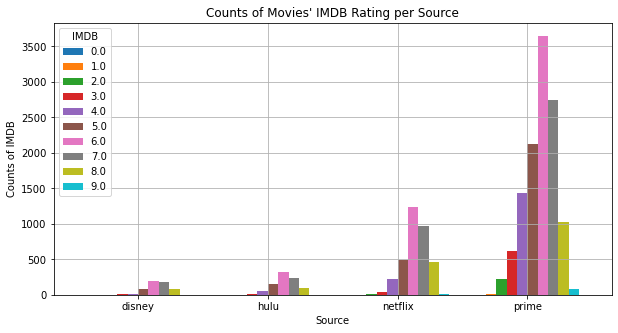

In [10]:
# Create a bar chart off of a pivot analysis of the group dataframe created above
chart = imdb_df_group_1.pivot(index='Source', columns='IMDB', values='Count').plot(kind='bar',figsize=(10,5), rot=0, align='center',width=0.8, grid=True)
chart.set_xlabel("Source")
chart.set_ylabel("Counts of IMDB")
plt.title("Counts of Movies' IMDB Rating per Source")

plt.savefig(r'../Final_Datasets/Counts of Movies IMDB Rating per Source.png')

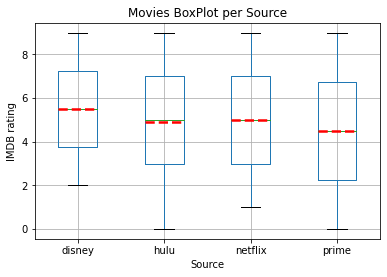

In [11]:
#boxplot using movies

meanlineprops = dict(linestyle='--', linewidth=2.5, color='red')

imdb_df_group_1.boxplot(by='Source', column='IMDB', meanprops= meanlineprops, showmeans=True, meanline=True)
plt.suptitle('') 
plt.title("Movies BoxPlot per Source" )
plt.ylabel("IMDB rating")
plt.savefig(r'../Final_Datasets/Boxplot Movies IMDB Rating per Source.png')
plt.show()